Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

Load Data

In [2]:
data = pd.read_csv('DATA - Sheet1.csv')
data.head()

,YEAR,Deposit Money Banks Financial Services Proxy By Bank Return on Assets,Mobile Money Transaction,Internet Banking Proxy By Total Bank Deposit,Automated Teller Machine (ATM),Digital Network Penetration (Internet User Index)
0,2000,2.557984,0,0.0,0.0,0
1,2001,3.260707,0,0.0,0.0,0
2,2002,2.443406,0,0.0,0.0,0
3,2003,1.841045,0,0.0,0.0,1
4,2004,2.024813,0,0.0,0.0,1


Preprocessing

In [3]:
data.describe(include='all')

,YEAR,Deposit Money Banks Financial Services Proxy By Bank Return on Assets,Mobile Money Transaction,Internet Banking Proxy By Total Bank Deposit,Automated Teller Machine (ATM),Digital Network Penetration (Internet User Index)
count,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000
mean,2010.500000,0.679455,4.165148e+06,507.504545,9.404091,15.318182
std,6.493587,5.437938,6.091039e+06,445.714068,7.027834,12.889222
min,2000.000000,-23.257140,0.000000e+00,0.000000,0.000000,0.000000
25%,2005.250000,0.995602,0.000000e+00,0.000000,0.955000,4.500000
50%,2010.500000,1.932929,0.000000e+00,488.600000,11.475000,13.000000
75%,2015.750000,2.360424,7.001586e+06,777.300000,16.180000,25.750000
max,2021.000000,3.800280,2.311638e+07,1310.400000,17.190000,38.000000


Exploring PDFs

C:\Users\user\Documents\ANA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Deposit Money Banks Financial Services Proxy By Bank Return on Assets', ylabel='Density'>

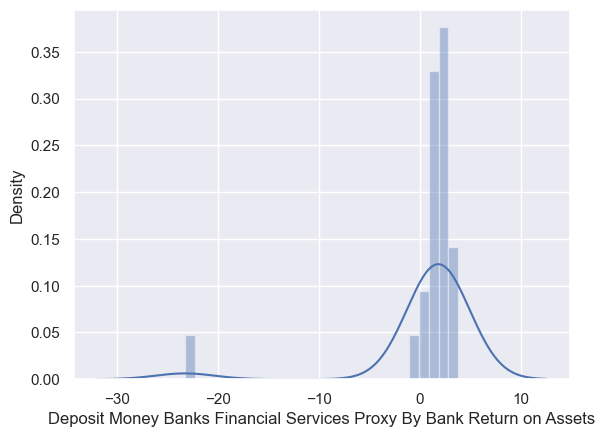

In [4]:
sns.distplot(data['Deposit Money Banks Financial Services Proxy By Bank Return on Assets'])

C:\Users\user\Documents\ANA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mobile Money Transaction', ylabel='Density'>

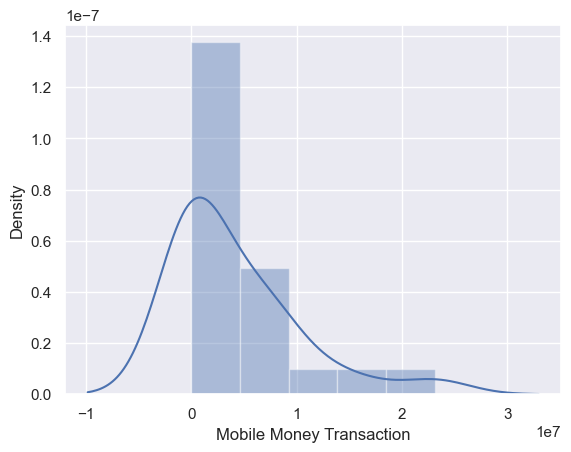

In [5]:
sns.distplot(data['Mobile Money Transaction'])

C:\Users\user\Documents\ANA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Automated Teller Machine (ATM)', ylabel='Density'>

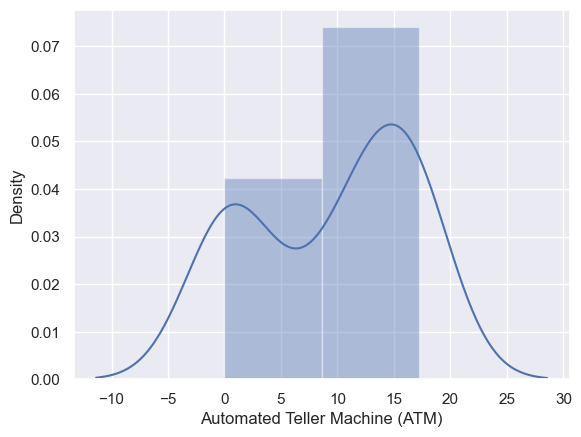

In [6]:
sns.distplot(data['Automated Teller Machine (ATM)'])

Check OLS assumptions

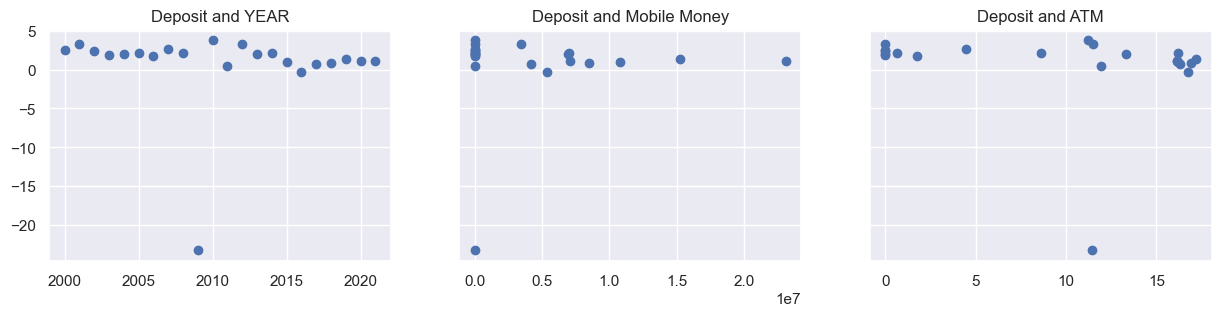

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data['YEAR'],data['Deposit Money Banks Financial Services Proxy By Bank Return on Assets'])
ax1.set_title('Deposit and YEAR')
ax2.scatter(data['Mobile Money Transaction'],data['Deposit Money Banks Financial Services Proxy By Bank Return on Assets'])
ax2.set_title('Deposit and Mobile Money')
ax3.scatter(data['Automated Teller Machine (ATM)'],data['Deposit Money Banks Financial Services Proxy By Bank Return on Assets'])
ax3.set_title('Deposit and ATM')


plt.show()

Multicollinearity

In [8]:
data.columns.values

array(['YEAR',
       'Deposit Money Banks Financial Services Proxy By Bank Return on Assets',
       'Mobile Money Transaction',
       'Internet Banking Proxy By Total Bank Deposit',
       'Automated Teller Machine (ATM)',
       'Digital Network Penetration (Internet User Index)'], dtype=object)

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['YEAR','Mobile Money Transaction','Automated Teller Machine (ATM)']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [10]:
vif

,VIF,features
0,2.996625,YEAR
1,2.759482,Mobile Money Transaction
2,5.351731,Automated Teller Machine (ATM)


Linear Regression Model

Declare the inputs and the targets

In [11]:
targets = data['Deposit Money Banks Financial Services Proxy By Bank Return on Assets']
inputs = data.drop(['Deposit Money Banks Financial Services Proxy By Bank Return on Assets'],axis=1)

Scale the data

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [13]:
inputs_scaled = scaler.transform(inputs)

Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.6, random_state=365)

Create the regression

In [15]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [16]:
y_hat = reg.predict(x_train)

C:\Users\user\Documents\ANA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

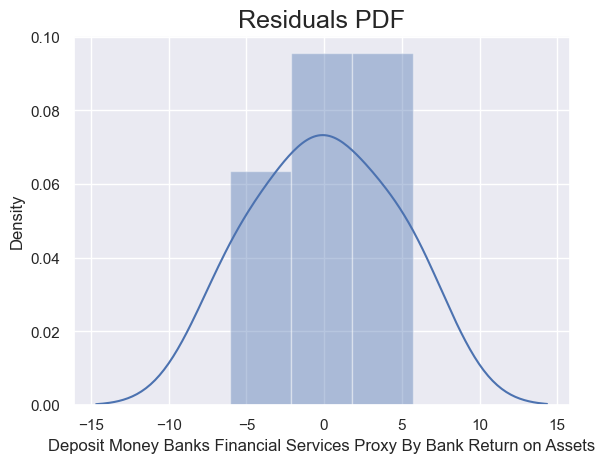

In [17]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [18]:
reg.score(x_train,y_train)

0.7635996231852993

Finding the weights and bias

In [19]:
reg.intercept_

4.305441894445352

In [20]:
reg.coef_

array([ 12.64975388,  30.60389105,  -0.87877232, -15.04335957,
       -12.84834079])

In [21]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,YEAR,12.649754
1,Mobile Money Transaction,30.603891
2,Internet Banking Proxy By Total Bank Deposit,-0.878772
3,Automated Teller Machine (ATM),-15.043360
4,Digital Network Penetration (Internet User Index),-12.848341


Testing

In [22]:
y_hat_test = reg.predict(x_test)

In [23]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,8.651475e-06
1,1.492685e-09
2,5.941050e+17
3,5.245512e+04
4,1.304440e+36


In [24]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,8.651475e-06,12.909765
1,1.492685e-09,NaN
2,5.941050e+17,NaN
3,5.245512e+04,6.303122
4,1.304440e+36,7.574694
5,4.116336e+09,NaN
6,3.152371e+00,5.779383
7,1.238279e-02,14.439868
8,1.567599e+02,8.209869
9,6.457124e+01,NaN


In [25]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,8.651475e-06,12.909765
1,1.492685e-09,NaN
2,5.941050e+17,NaN
3,5.245512e+04,6.303122
4,1.304440e+36,7.574694
5,4.116336e+09,NaN
6,3.152371e+00,5.779383
7,1.238279e-02,14.439868
8,1.567599e+02,8.209869
9,6.457124e+01,NaN


In [26]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']


In [27]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,8.651475e-06,12.909765,1.290976e+01,9.999993e+01
1,1.492685e-09,NaN,NaN,NaN
2,5.941050e+17,NaN,NaN,NaN
3,5.245512e+04,6.303122,-5.244881e+04,8.321086e+05
4,1.304440e+36,7.574694,-1.304440e+36,1.722102e+37
5,4.116336e+09,NaN,NaN,NaN
6,3.152371e+00,5.779383,2.627013e+00,4.545490e+01
7,1.238279e-02,14.439868,1.442749e+01,9.991425e+01
8,1.567599e+02,8.209869,-1.485500e+02,1.809408e+03
9,6.457124e+01,NaN,NaN,NaN


In [28]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,1.400000e+01,9.000000,9.000000e+00,9.000000e+00
mean,9.317425e+34,12.145640,-1.449377e+35,1.913446e+36
std,3.486261e+35,12.790771,4.348132e+35,5.740339e+36
min,1.492685e-09,1.520898,-1.304440e+36,4.545490e+01
25%,3.102187e-03,6.303122,-4.726888e+02,9.991425e+01
50%,3.386180e+01,7.859461,2.627013e+00,1.000000e+02
75%,3.945989e+04,12.909765,1.290976e+01,3.107958e+04
max,1.304440e+36,44.713703,4.426148e+01,1.722102e+37


In [29]:
data

,YEAR,Deposit Money Banks Financial Services Proxy By Bank Return on Assets,Mobile Money Transaction,Internet Banking Proxy By Total Bank Deposit,Automated Teller Machine (ATM),Digital Network Penetration (Internet User Index)
0,2000,2.557984,0,0.0,0.00,0
1,2001,3.260707,0,0.0,0.00,0
2,2002,2.443406,0,0.0,0.00,0
3,2003,1.841045,0,0.0,0.00,1
4,2004,2.024813,0,0.0,0.00,1
5,2005,2.096575,0,0.0,0.68,4
6,2006,1.754297,0,0.0,1.78,6
7,2007,2.669993,0,296.2,4.48,7
8,2008,2.105337,0,311.9,8.64,8
9,2009,-23.257140,0,464.5,11.46,9


P-value of Mobile Money Transaction

In [30]:
from scipy import stats
stats.ttest_ind(data['Deposit Money Banks Financial Services Proxy By Bank Return on Assets'], data['Mobile Money Transaction'])

Ttest_indResult(statistic=-3.207379724727917, pvalue=0.0025636147537159474)

P-value of Internet Banking

In [31]:
stats.ttest_ind(data['Deposit Money Banks Financial Services Proxy By Bank Return on Assets'], data['Internet Banking Proxy By Total Bank Deposit'])

Ttest_indResult(statistic=-5.3331129932589825, pvalue=3.588081069693564e-06)

P-value of ATM

In [32]:
stats.ttest_ind(data['Deposit Money Banks Financial Services Proxy By Bank Return on Assets'], data['Automated Teller Machine (ATM)'])

Ttest_indResult(statistic=-4.605222780387721, pvalue=3.793876113970926e-05)

Digital Network Penetration

In [33]:
stats.ttest_ind(data['Deposit Money Banks Financial Services Proxy By Bank Return on Assets'], data['Digital Network Penetration (Internet User Index)'])

Ttest_indResult(statistic=-4.908125735884473, pvalue=1.4337806986645451e-05)

YEAR

In [34]:
stats.ttest_ind(data['Deposit Money Banks Financial Services Proxy By Bank Return on Assets'], data['YEAR'])

Ttest_indResult(statistic=-1112.9982373844573, pvalue=1.6706884585640774e-95)

Summary Statistics

In [35]:
y = data ['Deposit Money Banks Financial Services Proxy By Bank Return on Assets'] 
x1 = data.drop(['Deposit Money Banks Financial Services Proxy By Bank Return on Assets'],axis=1)

In [36]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                      OLS Regression Results                                                     
=================================================================================================================================
Dep. Variable:     Deposit Money Banks Financial Services Proxy By Bank Return on Assets   R-squared:                       0.242
Model:                                                                               OLS   Adj. R-squared:                  0.006
Method:                                                                    Least Squares   F-statistic:                     1.024
Date:                                                                   Fri, 10 Mar 2023   Prob (F-statistic):              0.436
Time:                                                                           16:26:49   Log-Likelihood:                -64.905
No. Observations:                                                                     22   AIC:                             141.8
Df Residuals:                                                                         16   BIC:                             148.4
Df Model:                                                                              5                                         
Covariance Type:                                                               nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                               970.8331   2902.945      0.334      0.742   -5183.136    7124.802
YEAR                                                 -0.4841      1.450     -0.334      0.743      -3.557       2.589
Mobile Money Transaction                          -1.236e-07   3.97e-07     -0.312      0.759   -9.64e-07    7.17e-07
Internet Banking Proxy By Total Bank Deposit         -0.0171      0.014     -1.199      0.248      -0.047       0.013
Automated Teller Machine (ATM)                       -0.5678      0.580     -0.979      0.342      -1.798       0.662
Digital Network Penetration (Internet User Index)     1.1530      0.779      1.481      0.158      -0.498       2.803
==============================================================================
Omnibus:                       27.916   Durbin-Watson:                   2.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.774
Skew:                          -2.164   Prob(JB):                     2.85e-13
Kurtosis:                       9.655   Cond. No.                     1.82e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""